# Assignment: Principal Components Analysis (PCA)

Task 1: Implement PCA on the diatoms database. Please output the proportion of variance explained by each of the first 10 components (5 points)

Task 2: Visualize fourth component of the PCA (3 points)



We start by loading the dataset found in the file 'diatoms.txt', which contains a set of *diatom* outlines. A diatom is a type of algae, whose species is strongly correlated with its outline shape; in the following, we will be using these outlines as a descriptive feature of the diatom.

The file 'diatoms.txt' contains 780 diatoms described by 90 successive "landmark points" (x_i, y_i) along the outline, recorded as (x_0, y_0, x_1, y_1, ..., x_89, y_89).

The file 'diatoms_classes.txt' contains one class assignment per diatom, into species classified by the integers 1-37.

In [5]:
import numpy as np

np.set_printoptions(precision=4, suppress=True)


diatoms = np.loadtxt('diatoms.txt', delimiter=',').T
diatoms_classes = np.loadtxt('diatoms_classes.txt', delimiter=',')
print('Shape of diatoms:', diatoms.shape)
print('Shape of diatoms_classes:', diatoms_classes.shape)
#print('Classes:', diatoms_classes)

d,N = diatoms.shape
print('Dimension:', d)
print('Sample size:', N)
print(diatoms)

Shape of diatoms: (180, 780)
Shape of diatoms_classes: (780,)
Dimension: 180
Sample size: 780
[[16.99   15.617  16.874  ... 17.926  17.951  17.75  ]
 [-0.0433 -0.0464 -0.0357 ... -0.0301 -0.0172 -0.0058]
 [16.666  15.335  16.433  ... 17.315  17.516  17.111 ]
 ...
 [ 1.1789  1.4498  1.0577 ...  0.4067  0.5088  0.5687]
 [16.814  15.484  16.594  ... 17.295  17.352  17.382 ]
 [ 0.7341  0.7304  0.7266 ...  0.4819  0.5659  0.7156]]


Here's a function that will plot a given diatom. Let's try it on the first diatom in the dataset.

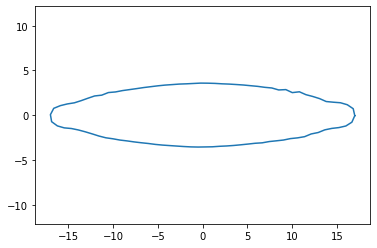

In [2]:
import matplotlib.pyplot as plt

def plot_diatom(diatom):
    xs = np.zeros(91)
    ys = np.zeros(91)
    for i in range(90):
        # Loop from 0 - 179
        xs[i] = diatom[2*i]
        ys[i] = diatom[2*i+1]
    
    # Loop around to first landmark point to get a connected shape
    xs[90] = xs[0]
    ys[90] = ys[0]
    
    plt.plot(xs, ys)    
    plt.axis('equal')   

plot_diatom(diatoms[:,0])

Let's next compute the mean diatom and plot it.

(180,)
[ 15.8688  -0.0172  15.6485  -0.7232  15.1692  -1.2388  14.5678  -1.6171
  13.9024  -1.9073  13.2049  -2.171   12.4963  -2.4178  11.7849  -2.667
  11.0589  -2.8988  10.3208  -3.1199   9.5735  -3.3213   8.8176  -3.5063
   8.0563  -3.6785   7.2903  -3.8363   6.5206  -3.9807   5.7474  -4.1126
   4.971   -4.2305   4.1923  -4.3372   3.4116  -4.4299   2.6297  -4.51
   1.8482  -4.5832   1.0651  -4.6351   0.2782  -4.6621  -0.5122  -4.6457
  -1.2971  -4.5881  -2.0778  -4.5107  -2.8566  -4.4141  -3.6361  -4.3119
  -4.4115  -4.1906  -5.1868  -4.0691  -5.9585  -3.928   -6.7272  -3.7781
  -7.4921  -3.6142  -8.2522  -3.4371  -9.0068  -3.246   -9.756   -3.0454
 -10.497   -2.8306 -11.2303  -2.6031 -11.9548  -2.3666 -12.6728  -2.1256
 -13.3891  -1.8848 -14.1021  -1.646  -14.7924  -1.3771 -15.4198  -1.0101
 -15.8888  -0.4633 -16.0323   0.2737 -15.8225   0.9801 -15.33     1.48
 -14.6992   1.8015 -14.0082   2.0367 -13.286    2.2362 -12.5579   2.4279
 -11.8256   2.6198 -11.0858   2.8047 -10.3368   2

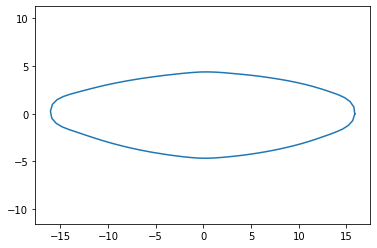

In [6]:
mean_diatom = np.mean(diatoms, 1)
print(mean_diatom.shape)
print(mean_diatom)
plot_diatom(mean_diatom)

### Task1: Implementing PCA

To implement PCA, please check the algorithm explaination from the lecture.
Hits:

1) Noramilize data subtracting the mean shape. No need to use Procrustes Analysis or other more complex types of normalization

2) Compute covariance matrix (check np.cov)

3) Compute eigenvectors and values (check np.linalg.eigh)

In [6]:
import numpy.matlib

def pca(data):
    mean = np.mean(data, 1)
    data_cent = np.array(data)
 
    for i in range(data.shape[1]):
        data_cent[:,i] = data[:,i] - mean
    
    cov = np.cov(data_cent)
    
    w, v = np.linalg.eigh(cov)
    PCevals = np.flip(w)
    PCevecs = np.flip(v)
    #PCevecs = np.flip(v, axis=1) // 

    return PCevals, PCevecs, data_cent
    
PCevals, PCevecs, data_cent = pca(diatoms)


# PCevals is a vector of eigenvalues in decreasing order. To verify, uncomment:
print(PCevecs)
# PCevecs is a matrix whose columns are the eigenvectors listed in the order of decreasing eigenvectors




[[-0.0931  0.0252 -0.185  ...  0.0028  0.0007  0.0001]
 [-0.0008 -0.0001  0.0042 ...  0.0098  0.011   0.0069]
 [-0.0899  0.056  -0.1583 ... -0.0014 -0.0011  0.0036]
 ...
 [ 0.0068 -0.0036 -0.0355 ... -0.0005  0.0035 -0.0005]
 [-0.0887 -0.0111 -0.1779 ... -0.0033 -0.0005  0.0015]
 [-0.0004  0.0021 -0.023  ... -0.0045 -0.0017 -0.0048]]


***Recall:***
* The eigenvalues represent the variance of the data projected to the corresponding eigenvectors. 
* Thus, the 2D linear subspace with highest projected variance is spanned by the eigenvectors corresponding to the two largest eigenvalues.
* We extract these eigenvectors and plot the data projected onto the corresponding space.

### Compute variance of the first 10 components

How many components you need to cover 90%, 95% and 99% of variantion. Submit the resulting numbers for grading.

Proportion of variance explained by the first 1 principal components: 0.7718721493017527
Proportion of variance explained by the first 2 principal components: 0.9276996293043025
Proportion of variance explained by the first 3 principal components: 0.9521198453942007
Proportion of variance explained by the first 4 principal components: 0.9637878603999529
Proportion of variance explained by the first 5 principal components: 0.9739084497954094
Proportion of variance explained by the first 6 principal components: 0.98236065164916
Proportion of variance explained by the first 7 principal components: 0.9889975933245944
Proportion of variance explained by the first 8 principal components: 0.9910287023941854
Proportion of variance explained by the first 9 principal components: 0.9926692113360289
Proportion of variance explained by the first 10 principal components: 0.9939926229665051


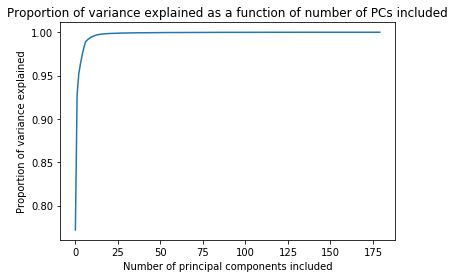

In [7]:
variance_explained_per_component = PCevals/np.sum(PCevals)
cumulative_variance_explained = np.cumsum(variance_explained_per_component)

plt.plot(cumulative_variance_explained)
plt.xlabel('Number of principal components included')
plt.ylabel('Proportion of variance explained')
plt.title('Proportion of variance explained as a function of number of PCs included')

# Let's print out the proportion of variance explained by the first 10 PCs
for i in range(10):
    print('Proportion of variance explained by the first '+str(i+1)+' principal components:', cumulative_variance_explained[i])

### Task2: Plot varianace accosiated with the first component

Please fill the gaps in the code to plot mean diatom shape with added FOURTH eigenvector mulitplied by [-3,-2,-1,0,1,2,3] standard deviations corresponding to this eigenvector.

Submit the resulting plot for grading.

(180,)
[ 0.017   0.0075 -0.007   0.0237 -0.0575  0.102  -0.0911  0.1872 -0.0974
  0.2371 -0.0871  0.2227 -0.071   0.1735 -0.0494  0.1135 -0.0301  0.0618
 -0.0142  0.0232 -0.0023 -0.0023  0.0059 -0.019   0.0129 -0.0287  0.0172
 -0.0312  0.0204 -0.0289  0.0217 -0.0209  0.0217 -0.0098  0.0191  0.0052
  0.0142  0.0227  0.0074  0.0457  0.0003  0.0675 -0.0044  0.0877 -0.0053
  0.1003 -0.0036  0.0946 -0.0057  0.0737 -0.0117  0.0452 -0.0193  0.0173
 -0.0252 -0.0072 -0.031  -0.032  -0.0333 -0.0493 -0.0334 -0.0633 -0.0323
 -0.0724 -0.0299 -0.0775 -0.0257 -0.0767 -0.0192 -0.0676 -0.0108 -0.0525
  0.0002 -0.0252  0.0143  0.0131  0.0331  0.0664  0.0542  0.1248  0.0726
  0.1749  0.0842  0.1849  0.0867  0.1433  0.0676  0.0732  0.0276  0.0079
  0.0026 -0.0132  0.0451 -0.0423  0.0945 -0.1156  0.115  -0.1881  0.1127
 -0.2262  0.101  -0.2125  0.0807 -0.157   0.0584 -0.0962  0.0376 -0.0363
  0.0215  0.0051  0.0092  0.0353 -0.0007  0.0549 -0.0073  0.0633 -0.0126
  0.0703 -0.0163  0.0684 -0.0183  0.0605 -0.

Text(0.5, 1.0, 'Diatom shape along PC1')

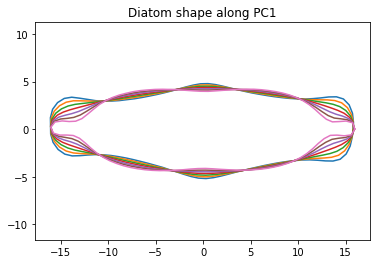

In [9]:
e4 = PCevecs[:, 3] # gets the fourth eigenvector
print(e4.shape)
print(e4)
lambda4 = PCevals[3] # gets the fourth eigenvalue
print(lambda4)
std4 = np.sqrt(lambda4) # In case the naming std is confusing -- the eigenvalues have a statistical interpretation

diatoms_along_pc = np.zeros((7, 180))
for i in range(7):
    #.......
    diatoms_along_pc[i] = mean_diatom + (i-3)*std4*e4
for i in range(7):
    plot_diatom(diatoms_along_pc[i])

plt.title('Diatom shape along PC1')